In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_excel('Bird Strikes data.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 25429 non-null  object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [4]:
data.head(5)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [5]:
# Remove unnecessary columns
data.drop(columns=['Record ID','Remarks','Origin State','Aircraft: Number of engines?'],inplace = True)

In [6]:
data.dropna(axis = 'index',inplace = True)

In [7]:
data.isnull().sum()

Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Airline/Operator                 0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above ground                          0
Number of people injured                   0
Is Aircraft Large?                         0
dtype: int

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25429 entries, 0 to 25557
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Aircraft: Type                           25429 non-null  object        
 1   Airport: Name                            25429 non-null  object        
 2   Altitude bin                             25429 non-null  object        
 3   Aircraft: Make/Model                     25429 non-null  object        
 4   Wildlife: Number struck                  25429 non-null  object        
 5   Wildlife: Number Struck Actual           25429 non-null  int64         
 6   Effect: Impact to flight                 25429 non-null  object        
 7   FlightDate                               25429 non-null  datetime64[ns]
 8   Effect: Indicated Damage                 25429 non-null  object        
 9   Aircraft: Airline/Operator             

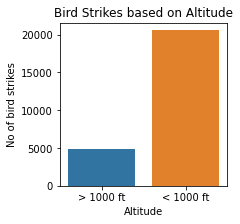

In [9]:
# No of bird strikes based on the altitude
plt.figure(figsize=(3,3))
sns.countplot(x = data['Altitude bin'])
plt.xlabel('Altitude')
plt.ylabel('No of bird strikes')
plt.title('Bird Strikes based on Altitude')
plt.show()

Most bird strikes happened at an altitude below 1000 ft

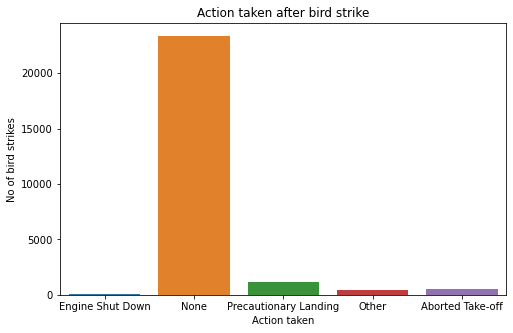

In [10]:
# What actions did the pilot take after the bird strike?
plt.figure(figsize=(8,5))
sns.countplot(x = data['Effect: Impact to flight'])
plt.xlabel('Action taken')
plt.ylabel('No of bird strikes')
plt.title('Action taken after bird strike')
plt.show()

Most bird strikes did not make the pilot take any action, i.e. the journey continued

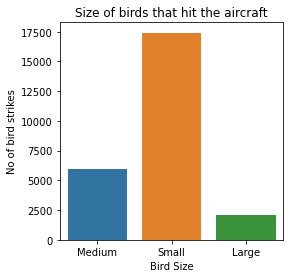

In [11]:
# Size of birds that hit the aircraft
plt.figure(figsize=(4,4))
sns.countplot(x = data['Wildlife: Size'])
plt.xlabel('Bird Size')
plt.ylabel('No of bird strikes')
plt.title('Size of birds that hit the aircraft')
plt.show()

Most birds were small in size, it might not have inflicted any damage to the aircraft, hence, most journeys continued even after bird strike 

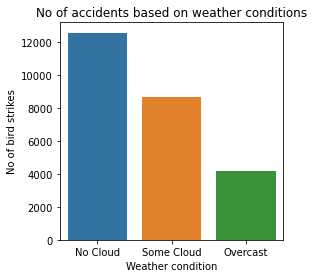

In [12]:
# Did weather conditions affect the pilot's vision?
plt.figure(figsize=(4,4))
sns.countplot(x = data['Conditions: Sky'])
plt.xlabel('Weather condition')
plt.ylabel('No of bird strikes')
plt.title('No of accidents based on weather conditions')
plt.show()

Close to 50% of the bird strikes took place due to weather conditions which were not favourable for flying an aircraft

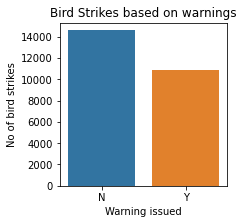

In [13]:
# Were the pilots cautioned about the birds?
plt.figure(figsize=(3,3))
sns.countplot(x = data['Pilot warned of birds or wildlife?'])
plt.xlabel('Warning issued')
plt.ylabel('No of bird strikes')
plt.title('Bird Strikes based on warnings')
plt.show()

Though warnings were issued to pilots in almost 40% of the cases, they could not seem to avoid the accident

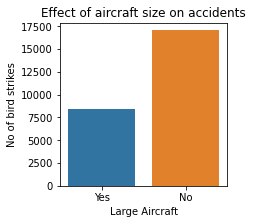

In [14]:
plt.figure(figsize=(3,3))
sns.countplot(x = data['Is Aircraft Large?'])
plt.xlabel('Large Aircraft')
plt.ylabel('No of bird strikes')
plt.title('Effect of aircraft size on accidents')
plt.show()

Almost two thirds of birds were struck by small aircrafts

In [15]:
# Writing a new csv file
data.to_csv('Bird Strikes.csv')